In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

In [2]:
df_city1 = pd.read_csv('Warangal_data.csv')
df_city2 = pd.read_csv('Hyderabad_data.csv')

In [3]:
df = pd.concat([df_city1, df_city2])

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [5]:
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

In [6]:
df.dropna(inplace=True)

In [7]:
X = df[['temperature', 'humidity', 'wind_speed','day_of_year','month']]
y = df['weather_condition']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
def predict_weather(temperature, humidity, wind_speed, day_of_year, month):

    # Predict weather condition
    prediction = model.predict([[temperature, humidity, wind_speed, day_of_year, month]])

    return prediction[0]

In [11]:
print(X_test.columns)

Index(['temperature', 'humidity', 'wind_speed', 'day_of_year', 'month'], dtype='object')


In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
predictions = []

for index, row in X_test.iterrows():
    day_of_year = row['day_of_year']
    month=row['month']  # Convert date to string
    temperature = row['temperature']
    humidity = row['humidity']
    wind_speed = row['wind_speed']

    prediction = predict_weather(temperature, humidity, wind_speed, day_of_year, month)

    predictions.append(prediction)

print(predictions)

['Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Normal', 'Normal', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Thunder', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Sunny', 'Rainy', 'Normal', 'Cloudy', 'Sunny', 'Cloudy', 'Cloudy', 'Normal', 'Normal', 'Rainy', 'Cloudy', 'Normal', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Normal', 'Cloudy', 'Cloudy', 'Normal', 'Normal', 'Cloudy', 'Thunder', 'Normal', 'Cloudy', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Normal', 'Sunny', 'Thunder', 'Rainy', 'Rainy', 'Normal', 'Cloudy', 'Cloudy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Normal', 'Cloudy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Normal', 'Rainy', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', '

In [14]:
from sklearn.metrics import accuracy_score
original_values = y

In [15]:
import pickle
from sklearn.ensemble import RandomForestClassifier

pickle.dump(model, open('weather_forecast.pkl', 'wb'))

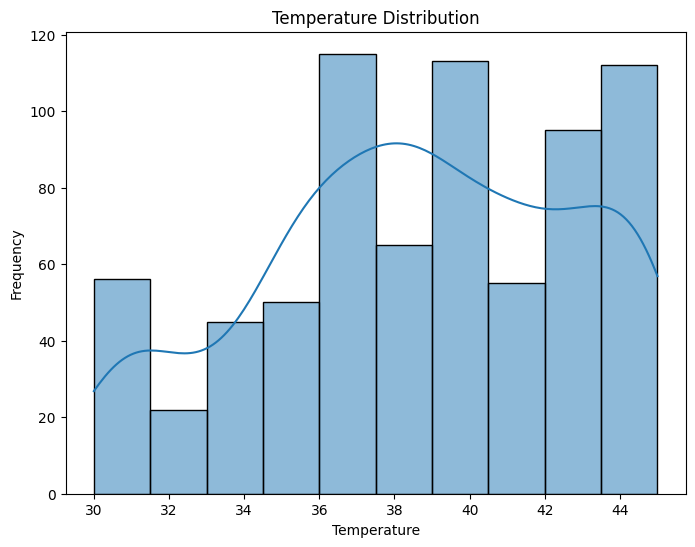

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

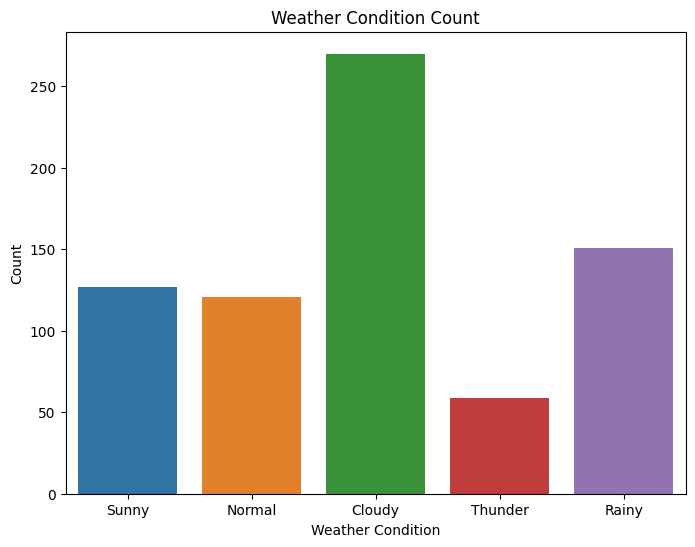

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='weather_condition')
plt.title('Weather Condition Count')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

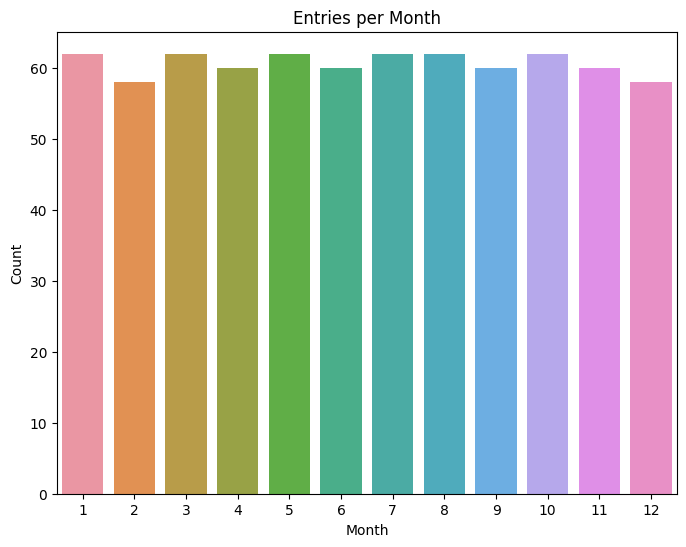

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='month')
plt.title('Entries per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

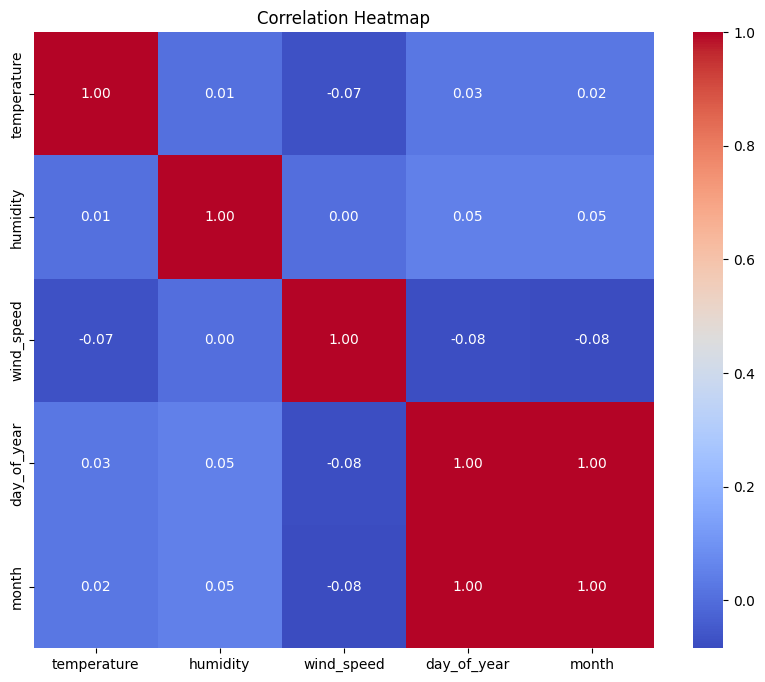

In [19]:
correlation_matrix = df[['temperature', 'humidity', 'wind_speed', 'day_of_year', 'month']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X)

accuracy = accuracy_score(original_values, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

precision = precision_score(original_values, y_pred, average='weighted')
print(f'Precision: {precision*100:.2f}%')

recall = recall_score(original_values, y_pred, average='weighted')
print(f'Recall: {recall*100:.2f}%')


f1 = f1_score(original_values, y_pred, average='weighted')
print(f'F1 Score: {f1*100:.2f}%')


Accuracy: 91.48%
Precision: 91.64%
Recall: 91.48%
F1 Score: 91.39%


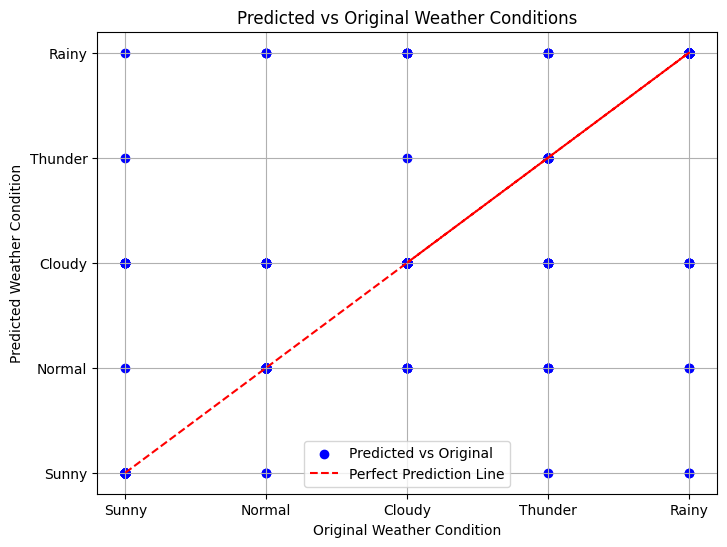

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(original_values, y_pred, color='blue', label='Predicted vs Original')

plt.plot(original_values, original_values, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Original Weather Condition')
plt.ylabel('Predicted Weather Condition')
plt.title('Predicted vs Original Weather Conditions')
plt.legend()
plt.grid(True)

plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred2= model2.predict(X)

accuracy = accuracy_score(original_values, y_pred2)
print(f'Accuracy: {accuracy*100:.2f}%')

precision = precision_score(original_values, y_pred2, average='weighted')
print(f'Precision: {precision*100:.2f}%')

recall = recall_score(original_values, y_pred2, average='weighted')
print(f'Recall: {recall*100:.2f}%')

f1 = f1_score(original_values, y_pred2, average='weighted')
print(f'F1 Score: {f1*100:.2f}%')

Accuracy: 90.38%
Precision: 90.35%
Recall: 90.38%
F1 Score: 90.32%


In [24]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [25]:
y_pred3= model3.predict(X)

accuracy = accuracy_score(original_values, y_pred3)
print(f'Accuracy: {accuracy*100:.2f}%')

precision = precision_score(original_values, y_pred3, average='weighted')
print(f'Precision: {precision*100:.2f}%')

recall = recall_score(original_values, y_pred3, average='weighted')
print(f'Recall: {recall*100:.2f}%')

f1 = f1_score(original_values, y_pred3, average='weighted')
print(f'F1 Score: {f1*100:.2f}%')

Accuracy: 37.09%
Precision: 13.76%
Recall: 37.09%
F1 Score: 20.07%
